# **Ejercicio 2: Breast Cancer Wisconsin (Diagnostic) Data Set:**
### https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

### **a. Describe el problema y el objetivo que se busca**

El estudio planteado en el documento busca predecir la posibilidad que una mujer pueda desarrollar cancer de mama.	Dentro del análisis realizado se incluyeron algunas variables que se derivan de las muestras (radiografías) tomadas a 	diversos pacientes; dichas variables corresponden a cada uno de los elementos o características que se obtuvieron en 	las pruebas y, a partir de algunas medidas resultantes, se determina si la paciente ha desarrollado o no el cancer.

### **b. Justifica si el problema requiere técnicas de balanceo de clases**



In [42]:
import pandas as pd
import requests, zipfile
from io import BytesIO
import seaborn as sns

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

df = pd.read_csv(path, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [43]:
df.shape

(699, 11)

In [44]:
columnas = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
 'Normal Nucleoli', 'Mitoses', 'Class']

df.columns = columnas
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [45]:
df.isna().sum().sort_values(ascending=False)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [46]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


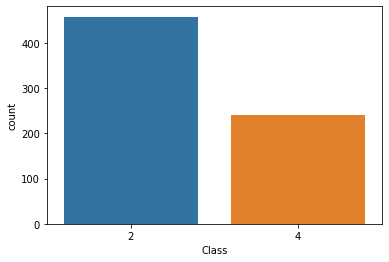

In [47]:
sns.countplot(df['Class']);

In [53]:
df['Class'].value_counts(2)

2    0.655222
4    0.344778
Name: Class, dtype: float64

Dentro del análisis realizado a la base de datos no se considera un problema de desbalanceo de clases dado que la clase positiva (cancer benigno) posee una proporción del 65.5% con respecto a la totalidad de la muestra, teniendo como clase negativa (cancer maligno) el 34.5%. Por ese motivo no es necesario realizar algún procedimiento para obtener un mejor balanceo de clases o corregir la distorsión de los datos entre las clases.

## **Analiza las implicaciones que conllevan los FN y FP**

Sin duda la mayor implicación que posee el modelo es tener un FP (Falso Positivo) dado que, para el estudio, la clase mayoritaria es padecer cancer benigno (casos verdaderos positivos). No obstante, si se generan casos en los que los pacientes sometidos al estudio obtienen un resultado de no padercer cancer maligno, teniendo como origen las variables explicativas con resultados contrarios en cuanto al padecimiento de la enfermedad, harian que las personas con dicho padecimiento, dado que el análisis les indicó no padecer cancer maligno, no se someterían a los procedimientos quirúrgicos o tratamientos adecuados para frenar la enfermedad y, por ende, deteriorar su condición física por las consecuencias de dicha enfermedad.

## **Decide y justifica la métrica a utilizar**

En este problema en específico, el costo de los FP suele ser mucho más alto que el de los FN, así que la métrica más adecuada es alguna que esté directamente correlacionada a la predicción de los casos Positivos. La métrica tradicional que se usa para evaluar las prediciones Positivas es la Precisión. La precisión se define como:

Precisión = ( TP / TP + FN )

Si bien, dentro de la información del esudio se determinó un Accuracy del 97,5%, seguramente se esperaría optimizarlo un poco mejor dado que, el costo es perjudicial para los interesados.